In [8]:
import os

folder_path = '/content/drive/MyDrive/Multi-Relational Dataset Assignment/Relational Dataset'
files = os.listdir(folder_path)

print("Files in folder:")
for file in files:
    print(file)

Files in folder:
test_Y3wMUE5_7gLdaTN.csv
train_u6lujuX_CVtuZ9i.csv


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [10]:
train_path = '/content/drive/MyDrive/Multi-Relational Dataset Assignment/Relational Dataset/train_u6lujuX_CVtuZ9i.csv'
df = pd.read_csv(train_path)

In [11]:
df.drop('Loan_ID', axis=1, inplace=True)

# Fill missing values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

# Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

/tmp/ipython-input-101247191.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-101247191.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [12]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [15]:
log_model = LogisticRegression(max_iter=10000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

In [16]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [19]:
print("🔹 Logistic Regression Evaluation 🔹")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))

print("\n🔹 Random Forest Evaluation 🔹")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

🔹 Logistic Regression Evaluation 🔹
Confusion Matrix:
 [[ 27  38]
 [  2 118]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.42      0.57        65
           1       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

Accuracy: 0.7837837837837838

🔹 Random Forest Evaluation 🔹
Confusion Matrix:
 [[ 32  33]
 [  8 112]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.49      0.61        65
           1       0.77      0.93      0.85       120

    accuracy                           0.78       185
   macro avg       0.79      0.71      0.73       185
weighted avg       0.78      0.78      0.76       185

Accuracy: 0.7783783783783784


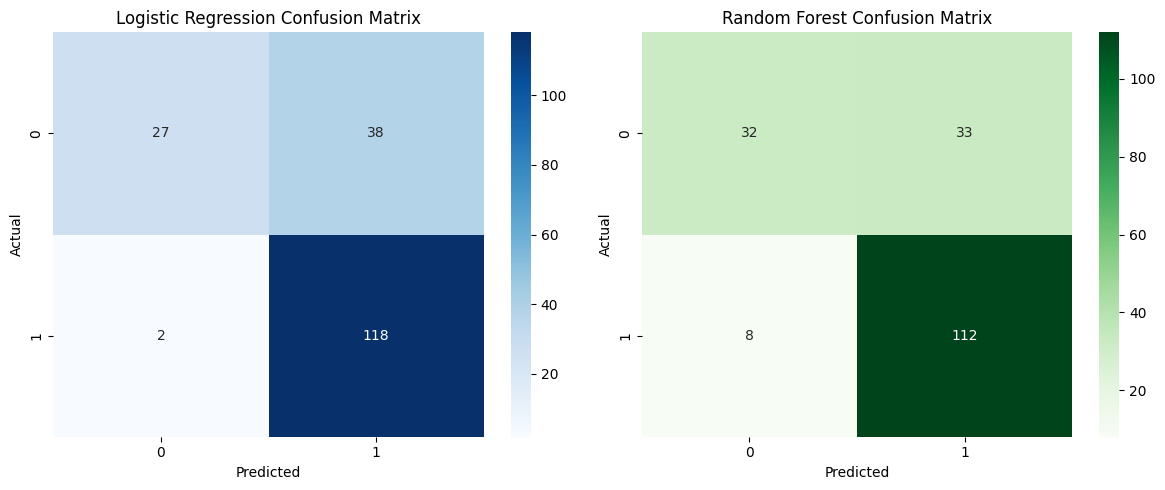

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrices
log_cm = confusion_matrix(y_test, y_pred_log)
rf_cm = confusion_matrix(y_test, y_pred_rf)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression Confusion Matrix
sns.heatmap(log_cm, annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_title("Logistic Regression Confusion Matrix")
axs[0].set_xlabel("Predicted")
axs[0].set_ylabel("Actual")

# Random Forest Confusion Matrix
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens', ax=axs[1])
axs[1].set_title("Random Forest Confusion Matrix")
axs[1].set_xlabel("Predicted")
axs[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()
